In [2]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [3]:
images=tf.data.Dataset.list_files('data-2\\*.jpeg')

In [4]:
images.as_numpy_iterator().next()

b'data-2\\img (15).jpeg'

In [5]:
def load_image(path):
    byte_img=tf.io.read_file(path)
    img=tf.image.decode_jpeg(byte_img)
    return img

In [6]:
images=images.map(load_image)

In [7]:
images.as_numpy_iterator().next()

array([[[ 17,  21,  30],
        [ 22,  26,  37],
        [ 26,  30,  42],
        ...,
        [ 15,  15,  15],
        [ 25,  17,  14],
        [ 36,  27,  20]],

       [[ 17,  21,  32],
        [ 22,  26,  37],
        [ 24,  27,  42],
        ...,
        [ 13,  13,  13],
        [ 22,  17,  13],
        [ 35,  26,  19]],

       [[ 17,  23,  35],
        [ 20,  26,  40],
        [ 22,  25,  44],
        ...,
        [ 12,  12,  12],
        [ 20,  15,  11],
        [ 33,  26,  20]],

       ...,

       [[188, 176,  66],
        [164, 152,  68],
        [139, 122,  94],
        ...,
        [195, 164, 143],
        [204, 169, 150],
        [185, 148, 130]],

       [[187, 178,  59],
        [165, 154,  64],
        [136, 123,  89],
        ...,
        [199, 163, 147],
        [207, 167, 155],
        [190, 148, 136]],

       [[179, 171,  47],
        [165, 156,  61],
        [139, 126,  91],
        ...,
        [196, 158, 145],
        [206, 163, 154],
        [189, 145, 136]]

In [8]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [9]:
image_generator=images.batch(1).as_numpy_iterator()

In [10]:
plot_images=image_generator.next()

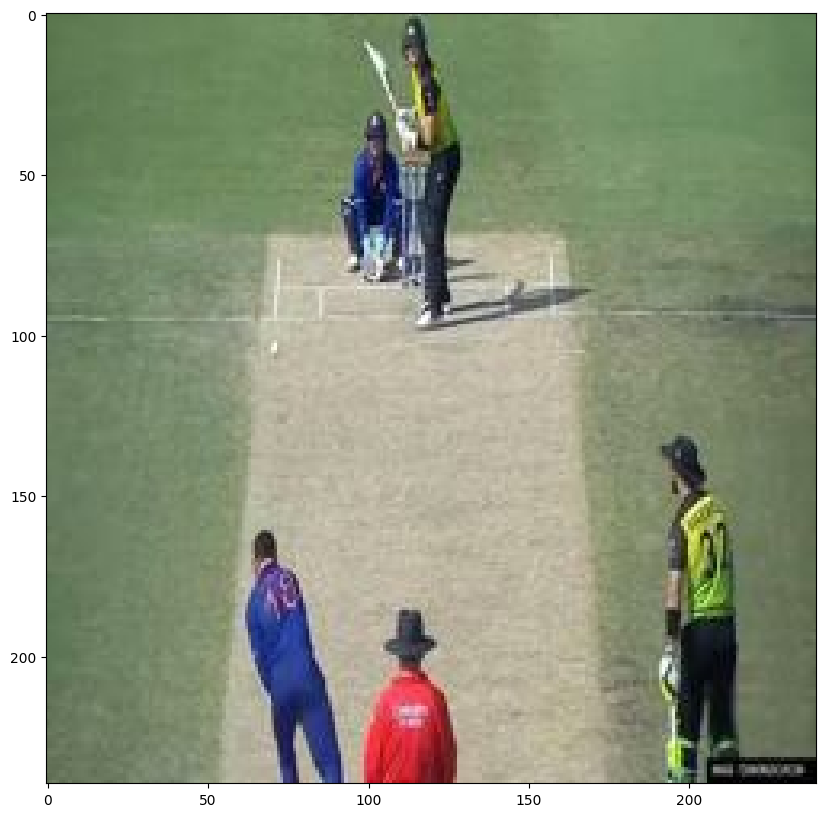

In [11]:
fig ,ax =plt.subplots(ncols=1 ,figsize=(10,10))
for image in plot_images:
    ax.imshow(image)
plt.show()

In [12]:
# image augumentation for the data
import albumentations as alb
augmentor = alb.Compose([alb.RandomCrop(width=240, height=240), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [13]:
import cv2
import os

In [14]:
img = cv2.imread(os.path.join('data-2','img (10).jpeg'))

In [15]:
label=open(os.path.join('data','img (10).json'),'r')
label=json.load(label)

In [16]:
label

{'version': '5.2.1',
 'flags': {},
 'shapes': [{'label': '1',
   'points': [[177.19895287958116, 176.8062827225131],
    [188.97905759162302, 191.72774869109946]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '..\\data-2\\img (10).jpeg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCADwAPADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1R

In [17]:
# extracting the cordinates from the labels
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [18]:
coords = list(np.divide(coords, [240, 240, 240, 240]))

In [19]:
coords

[0.7383289703315882,
 0.7366928446771379,
 0.7874127399650959,
 0.7988656195462478]

In [20]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['1'])

In [21]:
augmented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

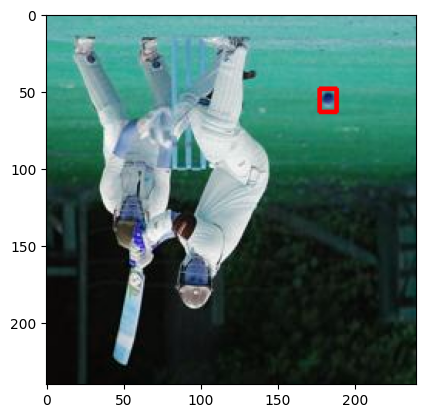

In [22]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [240,240]).astype(int)),
              # untransforming the bounding box
              tuple(np.multiply(augmented['bboxes'][0][2:], [240,240]).astype(int)),
              (255,0,0), 2)

plt.imshow(augmented['image'])

In [23]:
#doing all that for all image in the dataset
for image in os.listdir(os.path.join('data-2')):
    img = cv2.imread(os.path.join('data-2',image))
    coords = [0,0,0,0]
    label_path = os.path.join('data',image.split('.')[0]+'.json')
    if os.path.exists(label_path):
        label=open(label_path,'r')
        label=json.load(label)
        coords[0] = label['shapes'][0]['points'][0][0]
        coords[1] = label['shapes'][0]['points'][0][1]
        coords[2] = label['shapes'][0]['points'][1][0]
        coords[3] = label['shapes'][0]['points'][1][1]
        coords = list(np.divide(coords, [240, 240, 240, 240]))
    try: 
            for x in range(10):
                augmentor = alb.Compose([alb.RandomCrop(width=240, height=240), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['1'])
                cv2.imwrite(os.path.join('augdata','train','images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('augdata','train','labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

    except Exception as e:
        print(e)

x_max is less than or equal to x_min for bbox [0, 0, 0, 0, '1'].
x_max is less than or equal to x_min for bbox [0, 0, 0, 0, '1'].
x_max is less than or equal to x_min for bbox [0, 0, 0, 0, '1'].
x_max is less than or equal to x_min for bbox [0, 0, 0, 0, '1'].
